# A)

In [1]:
import random
import math

import matplotlib.pyplot as plt

def uniform (min, max, sample_size) -> list : 
  sample = []
  for i in range(sample_size):
     probability = random.random()
     sample.append( math.floor(min + probability * (max - min + 1)) )
  return sample

uniform_sample = uniform(2,5,20)
print(uniform_sample)

[3, 3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 3, 2, 4, 3, 5, 2, 5, 5, 3]


In [2]:
import numpy as np
import math


def gaussian_1d (mu, sigma, sample_size) -> list:
  sample = []
  for i in range(sample_size):
    s = np.random.normal(mu, sigma)
    sample.append( math.floor(s+1) )
  return sample

sample = gaussian_1d (10, 3, 20)
print (sample)

[11, 12, 6, 7, 3, 12, 15, 11, 7, 14, 10, 9, 6, 11, 9, 7, 13, 13, 10, 10]


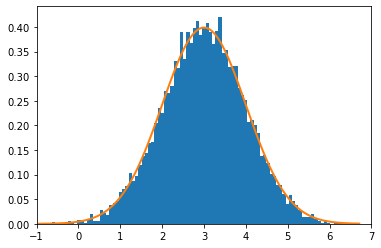

In [3]:
import numpy as np
import math
from scipy import stats

def rejection_sampling (mu, sigma) -> list:
  # Probability density distribution
  pdf = stats.norm(mu, sigma) 

  # set the range of the sampling space
  d_max = pdf.pdf(mu) # The maximum value of pdf of desired normal distribution

  while True:
    # Desired distribution
    x = np.random.uniform(mu - 5*sigma, mu + 5*sigma , 1) [0]
    # Pick a random sample from the range of sampling space
    y = np.random.uniform(0, d_max, 1)

    if y < pdf.pdf(x):
      break;
  return x

def get_samples (mu, sigma, n_samples):
  samples = []
  for i in range (n_samples) :
    sample = rejection_sampling(mu, sigma)
    samples.append(sample)
  return samples

samples = get_samples(3,1,10000)
count, bins, ignored = plt.hist (samples,100,density=True)
plt.plot(bins, stats.norm(3,1).pdf(bins), linewidth=2)
plt.xlim(-1,  7)
plt.show()

# B)

<function matplotlib.pyplot.show(close=None, block=None)>

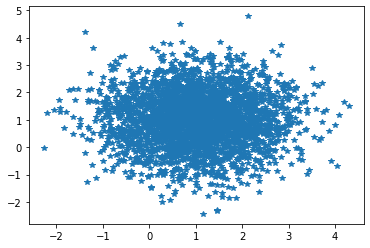

In [4]:
from scipy.stats import multivariate_normal
import random 
import matplotlib.pyplot as plt


def sample_2d_guassian (sample_size, mu, sigma):
  array_x = []
  array_y = []
  while len(array_x) < sample_size:
    x_min = mu[0] - (5*mu[0])
    x_max = mu[0] + (5*mu[0])
    y_min = mu[1] - (5*mu[1])
    y_max = mu[1] + (5*mu[1])
    
    # Sample x-variable
    new_x = random.uniform(x_min, x_max)
    
    # Sample y-variable
    new_y = random.uniform(y_min, y_max)
    
    # Sigma
    new_z = multivariate_normal.pdf([new_x, new_y], mu, sigma)
    sample = random.random()
    if sample < new_z:
      array_x.append(new_x)
      array_y.append(new_y)

  return array_x, array_y


array_x, array_y = sample_2d_guassian(3000, [1,1], [[1,0],[0,1]] ) 
plt.plot(array_x, array_y, '*')
plt.show

# C)

[1285, 3636, 984, 1285, 3327, 6536, 984, 5828, 1285, 5479, 5761, 984, 9778, 6536, 5479, 5479, 5828, 6536, 984, 5761, 3636, 984, 5761, 5690, 5690, 1285, 5479, 5828, 1285, 6536, 984, 8475, 3636, 990, 984, 111, 5479, 111, 1285, 9778, 1285, 5828, 990, 111, 5690, 5479, 111, 984, 5761, 984, 889, 990, 5690, 111, 6536, 9778, 111, 3327, 990, 1285, 6536, 5690, 1285, 984, 3327, 984, 111, 990, 3327, 5761, 1285, 889, 3636, 3636, 889, 3327, 1285, 984, 3327, 8475, 3327, 8475, 5828, 6536, 9778, 9778, 889, 8475, 1285, 9778, 990, 8475, 3327, 984, 3327, 3327, 8475, 5479, 5690, 3327, 8475, 889, 111, 889, 111, 8475, 9778, 990, 3327, 5828, 1285, 3327, 3636, 5761, 8475, 6536, 5479, 990, 5479, 3327, 889, 3636, 5479, 1285, 9778, 1285, 990, 9778, 889, 5828, 5690, 3327, 8475, 5828, 990, 5690, 111, 111, 1285, 990, 5690, 5828, 1285, 5761, 5479, 889, 6536, 6536, 6536, 889, 889, 1285, 984, 990, 111, 111, 8475, 3327, 6536, 5479, 9778, 990, 990, 889, 8475, 5690, 5828, 5479, 889, 6536, 5690, 111, 111, 111, 8475, 9778, 

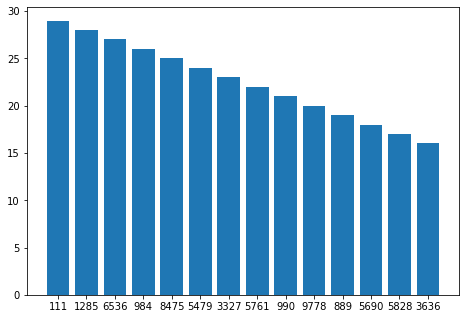

In [5]:
from string import ascii_lowercase
import numpy as np
from random import shuffle
import math
import random

density_dict = {}
collection = [];

def create_distribution (probability) :
  while len(collection) <300 :
    probability -= 1
    token = math.floor(random.random()* 10000) 
    density_dict[token] = probability
    collection.extend([token]*(probability))
  return density_dict , collection

probability = 30
density_dict, collection = create_distribution(probability)
shuffle(collection)
print(collection)
print(len(collection))
for key, val in density_dict.items():
  print('token: ', key, '  |', 'probability: ', val)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
token = list(str(i) for i in density_dict.keys())
density = list(density_dict.values())
ax.bar(token,density)
plt.show()

In [6]:
distance_matrix = []
for i in collection:
  row = []
  for j in collection:
    dist = abs(i-j)
    row.append(dist)
  distance_matrix.append(row)
# print(distance_matrix)

In [7]:
import numpy as np

similarity_score = []

for dist in distance_matrix:
  avg =  np.sum(dist) / (len(dist))
  similarity_score.append(avg)

indices_by_sim = np.argsort(similarity_score)
print (indices_by_sim)
print (collection[indices_by_sim[0]])
print (collection[indices_by_sim[1]])
print (collection[indices_by_sim[2]])
print (collection[indices_by_sim[3]])

[112 242 266 226 222 206  20 191  32  73 189  72 253   1 181 121 108 238
 236 119 219 111  57  78  64  99 202  68  95  94  92  75  80 131 157 277
 305   4 276  15  14 188 186 179 167 144   9 294  97 122 118 116 159 275
 210 262  26  45 270 240 244 237  36 257  24 165  23  44 140 288 273  61
 223 190 170  98 295 130 308  52 135 113 143 249 252 261 178 271 207  22
 205  19 201  69 278 281 224  48 289 185 290  10 254 291 166 133 303 193
 129 141 208 209 227 314  82 109   7  16  27  41 214  76  70 192  62  59
 110 216 232 241 250  88  38 260 268  28  25 286   8 302   3  40 151   0
 123 138 125 142 298 169 265 215 177  83 300  17 299 211 233  60 200 284
 115   5  13  29 148 228 158 310  54 309 147 146 243 107  33  67 126 234
 139 231 197  58  51 153 180 134 239 274 117  42 162  90 304 161 285  34
 218 256  63  49 221  18 255   6  65 152 312   2 248  30  47  21 176 263
  77 251 195 292  11  93 128 101 247  50 120 145 282 283 259 103  71  74
 149 225 168  86 267 163 150  37 264  35 104 246 22

In [8]:
cluster_size = 20
num_clusters = (len(collection) // cluster_size) + 1

print("number of clusters :", num_clusters)
def create_clusters(cluster_size, num_clusters, indices_by_sim, collection) :
    clusters = []
    head = 0
    tail = cluster_size
    prob_marker = 0

    for i in range(num_clusters):
      cluster_avg = 0
      clusters.append({ 'indices' : indices_by_sim[head:tail] })

      indices = clusters[i]['indices']
      cluster_probability = 0
      for index in indices:
        cluster_probability += collection.count(collection[index])    \
                            / len(collection)                        \
                            / len(indices)                           
      clusters[i]['prob_head'] = prob_marker
      clusters[i]['prob_tail'] = prob_marker + cluster_probability
      prob_marker = clusters[i]['prob_tail']

      if head > len(collection) :
        break;
      else: head += cluster_size
      if tail > len(collection) :
        tail = len(collection)
      else: tail += cluster_size   
    return clusters

clusters = create_clusters(cluster_size, num_clusters, indices_by_sim, collection)
for cluster in clusters :
  indices = cluster['indices']
  print (indices)
  tail = cluster['prob_tail']
  print (tail)

number of clusters : 16
[112 242 266 226 222 206  20 191  32  73 189  72 253   1 181 121 108 238
 236 119]
0.05523809523809524
[219 111  57  78  64  99 202  68  95  94  92  75  80 131 157 277 305   4
 276  15]
0.12841269841269845
[ 14 188 186 179 167 144   9 294  97 122 118 116 159 275 210 262  26  45
 270 240]
0.20460317460317465
[244 237  36 257  24 165  23  44 140 288 273  61 223 190 170  98 295 130
 308  52]
0.2646031746031746
[135 113 143 249 252 261 178 271 207  22 205  19 201  69 278 281 224  48
 289 185]
0.3338095238095238
[290  10 254 291 166 133 303 193 129 141 208 209 227 314  82 109   7  16
  27  41]
0.39015873015873015
[214  76  70 192  62  59 110 216 232 241 250  88  38 260 268  28  25 286
   8 302]
0.47904761904761906
[  3  40 151   0 123 138 125 142 298 169 265 215 177  83 300  17 299 211
 233  60]
0.566031746031746
[200 284 115   5  13  29 148 228 158 310  54 309 147 146 243 107  33  67
 126 234]
0.646984126984127
[139 231 197  58  51 153 180 134 239 274 117  42 162  9

token:  111   | probability:  29 /  315
token:  1285   | probability:  28 /  315
token:  6536   | probability:  27 /  315
token:  984   | probability:  26 /  315
token:  8475   | probability:  25 /  315
token:  5479   | probability:  24 /  315
token:  3327   | probability:  23 /  315
token:  5761   | probability:  22 /  315
token:  990   | probability:  21 /  315
token:  9778   | probability:  20 /  315
token:  889   | probability:  19 /  315
token:  5690   | probability:  18 /  315
token:  5828   | probability:  17 /  315
token:  3636   | probability:  16 /  315


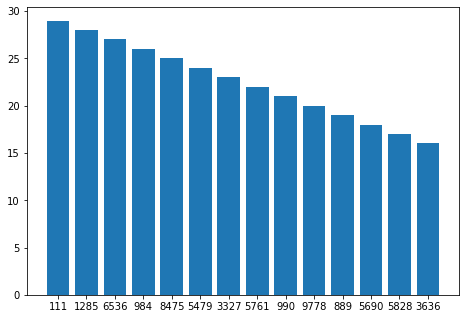

[5479, 9778, 3327, 5761, 3636, 3636, 6536, 5761, 990, 111, 5828, 8475, 9778, 5828, 6536, 990, 111, 984, 5828, 9778, 984, 990, 6536, 8475, 1285, 9778, 1285, 889, 8475, 3327, 889, 6536, 1285, 1285, 5761, 5479, 984, 5761, 3636, 5479, 111, 1285, 5761, 5690, 5479, 9778, 990, 111, 8475, 5690]
sample token    :  9778    |  sample probability :  5 /  50
sample token    :  5761    |  sample probability :  5 /  50
sample token    :  1285    |  sample probability :  5 /  50
sample token    :  8475    |  sample probability :  4 /  50
sample token    :  6536    |  sample probability :  4 /  50
sample token    :  5479    |  sample probability :  4 /  50
sample token    :  990    |  sample probability :  4 /  50
sample token    :  111    |  sample probability :  4 /  50
sample token    :  5828    |  sample probability :  3 /  50
sample token    :  3636    |  sample probability :  3 /  50
sample token    :  984    |  sample probability :  3 /  50
sample token    :  5690    |  sample probability :  2 /

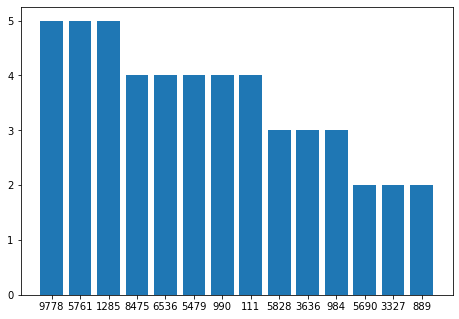

In [9]:
sample_size = 50
final_samples = []
from random import uniform
from numpy import unique

def sample_from_clusters (sample_size, clusters):
  samples = []
  for i in range(sample_size):
    sample_probability = uniform(0 , clusters[len(clusters)-1]['prob_tail'])
    for cluster in clusters:
      if  cluster['prob_head'] <  sample_probability < cluster['prob_tail'] :
       sample_index = random.choice(cluster['indices'])
    samples.append(collection[sample_index])
  return samples

for key, val in density_dict.items():
  print('token: ', key, '  |', 'probability: ', val, '/ ', len(collection))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
token = list(str(i) for i in density_dict.keys())
density = list(density_dict.values())
ax.bar(token,density)
plt.show()

samples = sample_from_clusters(sample_size, clusters)
print(samples)

deduped = sorted(unique(samples), reverse=True)
sample_dict = {}
for item in deduped:
  sample_dict[item] = samples.count(item)


sample_dict = dict(sorted(sample_dict.items(), key=lambda item: item[1], reverse=True))

for item in sample_dict:
  print('sample token    : ', item, '   | ', 'sample probability : ', samples.count(item), '/ ', sample_size)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
token = list(str(i) for i in sample_dict.keys())
density = list(sample_dict.values())
ax.bar(token,density)
plt.show()